In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
parameter = ['standard', 'q_8.25', 'q_6.5', 'q_4.75', 'q_3', 'n_4', 'n_6', 'n_10', 'n_12', 'h_18', 'h_30', 'h_36', 'h_42']

file_path = [
    r'C:\Users\jsw\Documents\GitHub\OV-PAM_model\Compression_test\standard.txt',
    r'C:\Users\jsw\Documents\GitHub\OV-PAM_model\Compression_test\q_8.25.log',
    r'C:\Users\jsw\Documents\GitHub\OV-PAM_model\Compression_test\q_6.5.log',
    r'C:\Users\jsw\Documents\GitHub\OV-PAM_model\Compression_test\q_4.75.log',
    r'C:\Users\jsw\Documents\GitHub\OV-PAM_model\Compression_test\q_3.log',
    r'C:\Users\jsw\Documents\GitHub\OV-PAM_model\Compression_test\n_4.log',
    r'C:\Users\jsw\Documents\GitHub\OV-PAM_model\Compression_test\n_6.log',
    r'C:\Users\jsw\Documents\GitHub\OV-PAM_model\Compression_test\n_10.log',
    r'C:\Users\jsw\Documents\GitHub\OV-PAM_model\Compression_test\n_12.log',
    r'C:\Users\jsw\Documents\GitHub\OV-PAM_model\Compression_test\h_18.log',
    r'C:\Users\jsw\Documents\GitHub\OV-PAM_model\Compression_test\h_30.log',
    r'C:\Users\jsw\Documents\GitHub\OV-PAM_model\Compression_test\h_36.log',
    r'C:\Users\jsw\Documents\GitHub\OV-PAM_model\Compression_test\h_42.log'
]

# 실험데이터를 불러옴
df_list = []  

for i in range(13):
    df = pd.read_csv(file_path[i], delimiter='\t', encoding='cp1252')
    # 'load' 열의 값 부호를 바꿈
    df['Load'] = -df['Load']
    df_list.append(df)


In [7]:
for i in range(13):
    print(parameter[i])
    print(df_list[i].head())

standard
   Reading  Load  Time  Column1
0        1  -0.0   0.0      NaN
1        2  -0.0   0.1      NaN
2        3  -0.0   0.2      NaN
3        4  -0.0   0.3      NaN
4        5  -0.0   0.4      NaN
q_8.25
   Reading  Load   Time  Unnamed: 3
0        1  -0.0  0.000         NaN
1        2  -0.0  0.100         NaN
2        3  -0.0  0.200         NaN
3        4  -0.0  0.300         NaN
4        5  -0.0  0.401         NaN
q_6.5
   Reading  Load  Time  Unnamed: 3
0        1  -0.4   0.0         NaN
1        2  -0.4   0.1         NaN
2        3  -0.4   0.2         NaN
3        4  -0.4   0.3         NaN
4        5  -0.4   0.4         NaN
q_4.75
   Reading  Load   Time  Unnamed: 3
0        1  -0.2  0.000         NaN
1        2  -0.2  0.100         NaN
2        3  -0.2  0.200         NaN
3        4  -0.2  0.301         NaN
4        5  -0.2  0.400         NaN
q_3
   Reading  Load  Time  Unnamed: 3
0        1  -0.1   0.0         NaN
1        2  -0.1   0.1         NaN
2        3  -0.1   0.2      

# Compression Test: Elastic Force of Actuator with varying parameters

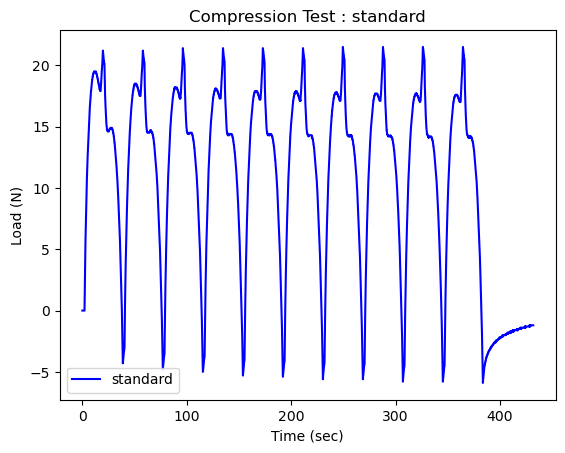

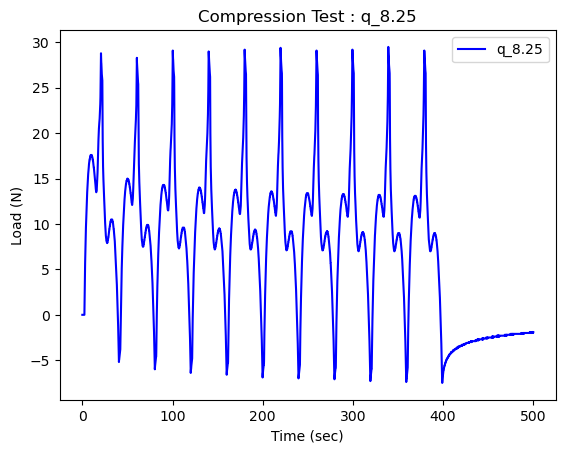

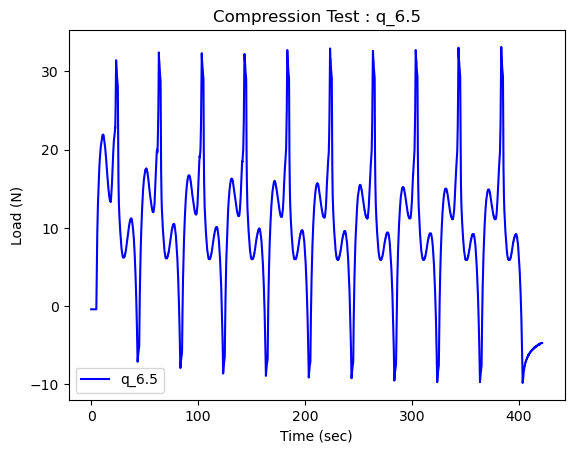

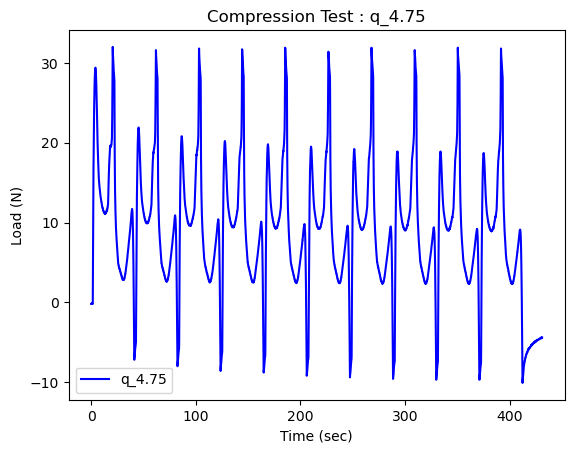

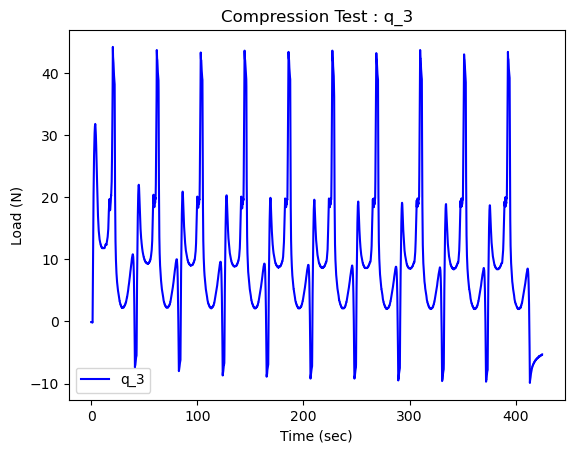

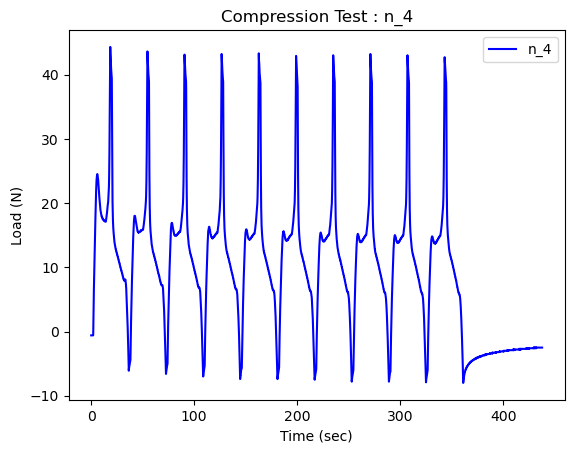

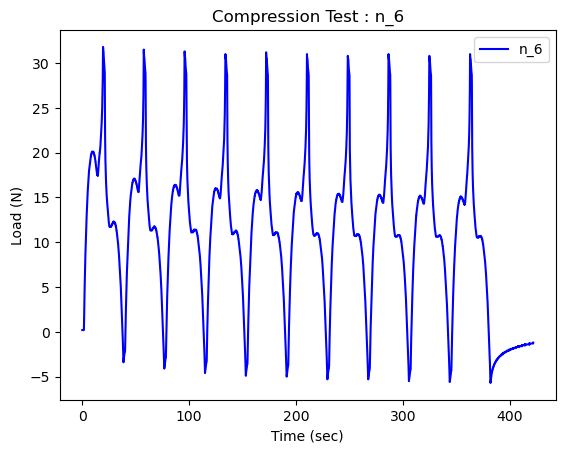

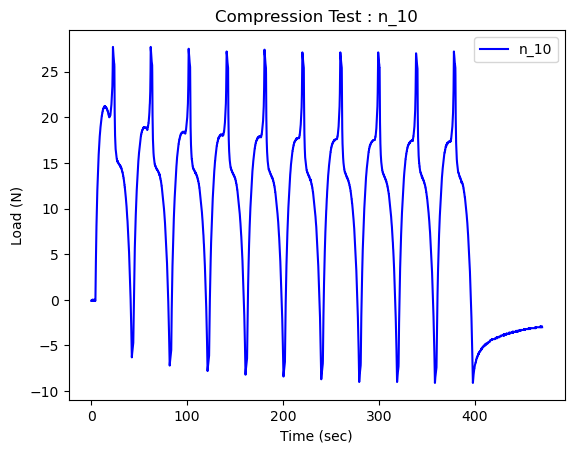

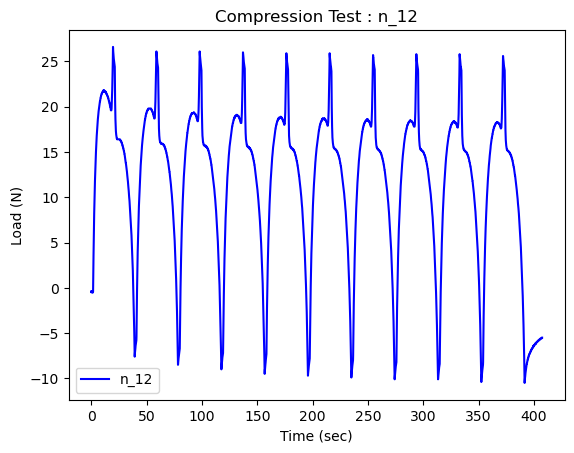

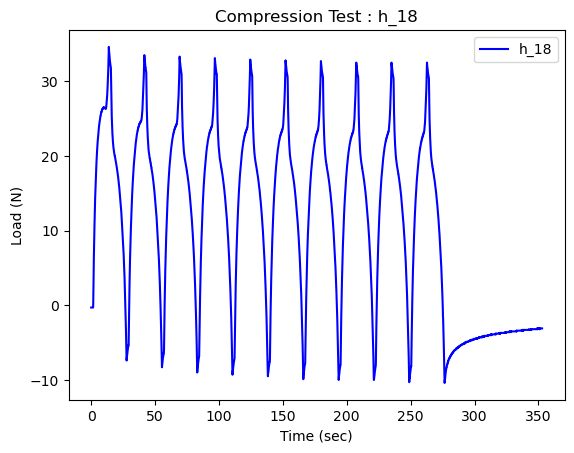

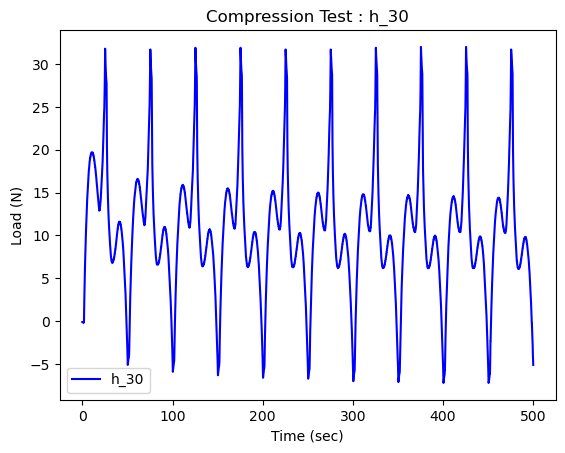

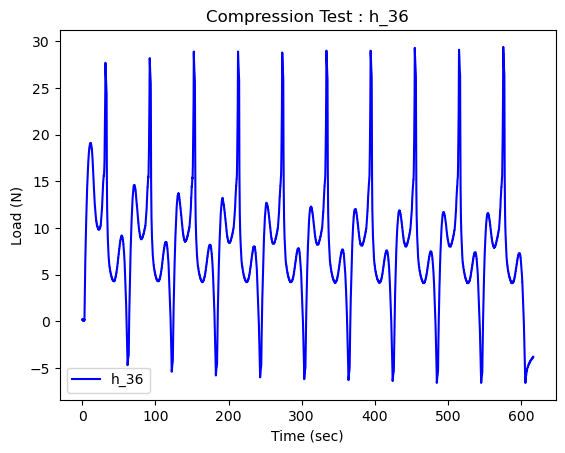

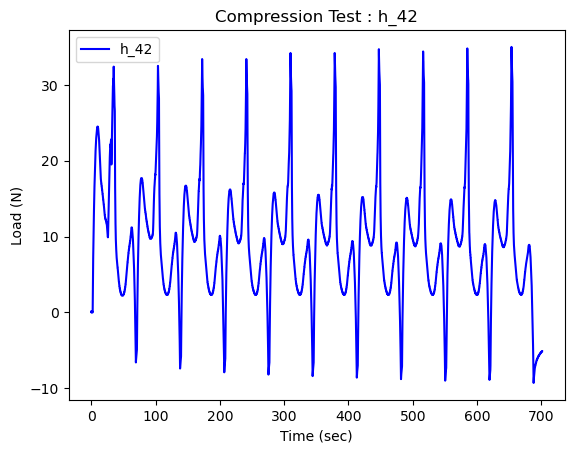

In [8]:
for i in range(13):
    plt.plot(df_list[i]['Time'], df_list[i]['Load'], linestyle='-', color='blue', label=parameter[i])
    
    plt.xlabel('Time (sec)')
    plt.ylabel('Load (N)')
    plt.title('Compression Test : '+ parameter[i])  # 여기서 제목을 설정

    plt.legend()
    plt.show()


In [9]:
avg_max_values = []
avg_min_values = []

for i in range(13):
    max_values = []
    min_values = []
    
    for cycle in range(10):
        start_index = cycle * len(df_list[i]) // 10
        end_index = (cycle + 1) * len(df_list[i]) // 10
        
        cycle_values = df_list[i]['Load'][start_index:end_index]
        
        max_val = cycle_values.max()
        min_val = cycle_values.min()
        
        max_values.append(max_val)
        min_values.append(min_val)
    
    avg_max = sum(max_values) / len(max_values)
    avg_min = sum(min_values) / len(min_values)
    
    avg_max_values.append(avg_max)
    avg_min_values.append(avg_min)
    
# 결과값을 DataFrame에 저장
result_df = pd.DataFrame({
    'Parameter': parameter,
    'Average Max Value [N]': avg_max_values,
    'Average Min Value [N]': avg_min_values
})

# 각 파라미터에 대한 통계적 정보 출력
result_df

,Parameter,Average Max Value [N],Average Min Value [N]
0,standard,19.14,-5.12
1,q_8.25,22.82,-6.22
2,q_6.5,32.53,-8.28
3,q_4.75,31.76,-9.03
4,q_3,43.51,-9.01
5,n_4,35.49,-6.93
6,n_6,28.26,-4.94
7,n_10,24.29,-7.83
8,n_12,25.95,-9.53
9,h_18,25.77,-8.48


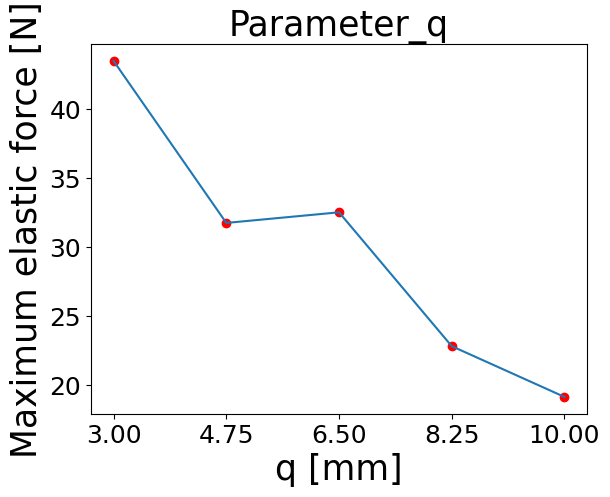

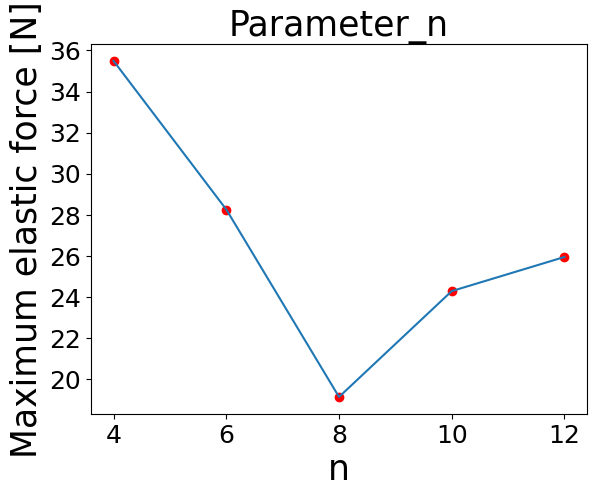

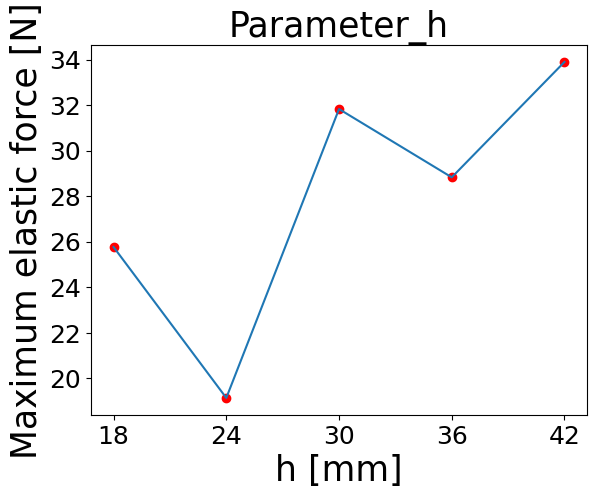

In [19]:
parameter_q = [3, 4.75, 6.5, 8.25, 10]
parameter_n = [4, 6, 8, 10, 12]
parameter_h = [18, 24, 30, 36, 42]

avg_max_values_q = [avg_max_values[4], avg_max_values[3], avg_max_values[2], avg_max_values[1], avg_max_values[0]]
avg_min_values_q = [avg_min_values[4], avg_min_values[3], avg_min_values[2], avg_min_values[1], avg_min_values[0]]
avg_max_values_n = [avg_max_values[5], avg_max_values[6], avg_max_values[0], avg_max_values[7], avg_max_values[8]]
avg_min_values_n = [avg_min_values[5], avg_min_values[6], avg_min_values[0], avg_min_values[7], avg_min_values[8]]
avg_max_values_h = [avg_max_values[9], avg_max_values[0], avg_max_values[10], avg_max_values[11], avg_max_values[12]]
avg_min_values_h = [avg_min_values[9], avg_min_values[0], avg_min_values[10], avg_min_values[11], avg_min_values[12]]

plt.plot(parameter_q, avg_max_values_q)
plt.scatter(parameter_q, avg_max_values_q, color='red', marker='o')
plt.title('Parameter_q', fontsize=25)  # 제목 크기 조절
plt.xlabel('q [mm]', fontsize=25)  # x축 제목 크기 조절
plt.ylabel('Maximum elastic force [N]', fontsize=25)  # y축 제목 크기 조절
plt.yticks(fontsize=18)
plt.xticks(parameter_q, fontsize=18)  # x축 눈금 설정
plt.show()

plt.plot(parameter_n, avg_max_values_n)
plt.scatter(parameter_n, avg_max_values_n, color='red', marker='o')
plt.xlabel('n', fontsize=25)
plt.ylabel('Maximum elastic force [N]', fontsize=25)
plt.title('Parameter_n', fontsize=25)
plt.yticks(fontsize=18)
plt.xticks(parameter_n, fontsize=18)  # x축 눈금 설정
plt.show()

plt.plot(parameter_h, avg_max_values_h)
plt.scatter(parameter_h, avg_max_values_h, color='red', marker='o')
plt.xlabel('h [mm]', fontsize=25)
plt.ylabel('Maximum elastic force [N]', fontsize=25)
plt.title('Parameter_h', fontsize=25)
plt.yticks(fontsize=18)
plt.xticks(parameter_h, fontsize=18)  # x축 눈금 설정
plt.show()
